<a href="https://colab.research.google.com/github/spros1/HeartFailureAnalysis/blob/main/ExcerA_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*## Subject 1 ## Import data from kaggle and load them to a dataframe*

In [122]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sprospap","key":"9a4854805a9655a32d9fa00b6ca4aa15"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 8.15MB/s]


In [ ]:
ls

heart-failure-clinical-data.zip  kaggle.json  sample_data/


In [ ]:
! unzip heart-failure-clinical-data.zip

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [ ]:
# Check dataset 
import pandas as pd
from google.colab import files
with open('heart_failure_clinical_records_dataset.csv', 'r') as data:
    df3 = pd.read_csv(data, encoding = ('ansi'))
    print (df3)

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


### Create an instance of Database and load to table the CSV

In [ ]:
# create the SQLite Database
%pip install csv-to-sqlite

In [ ]:
# import to table 
!csv-to-sqlite -f heart_failure_clinical_records_dataset.csv -t full -o db.sqlite

Written 299 rows into 1 tables in 0.022 seconds


### Accessing Database - Copy data to dataframe


In [ ]:
#Accessing the SQL Database
import sqlite3

In [ ]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [ ]:
conn = create_connection("db.sqlite")

In [ ]:
import pandas as pd 

cur = conn.cursor()
cur.execute(f"SELECT * FROM heart_failure_clinical_records_dataset " )
df = pd.DataFrame(cur.fetchall(), columns= [ 'Age', 'Anaemia', 'Creatinine_Phosphokinase', 'Diabetes', 'Ejection_Fraction', 'High_Blood_Pressure', 'Platelets', 'Serum_creatinine', 'Serum_Sodium', 'Sex', 'Smoking', 'Time', 'Death_Event'] )

print(df)

      Age  Anaemia  Creatinine_Phosphokinase  ...  Smoking  Time  Death_Event
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


##*## Subject 2 ## Check and clean the data*

We now have the data based in SQLite, and the dataframe df is ready to used for calculation in python

In [ ]:
df.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       299 non-null    float64
 1   Anaemia                   299 non-null    int64  
 2   Creatinine_Phosphokinase  299 non-null    int64  
 3   Diabetes                  299 non-null    int64  
 4   Ejection_Fraction         299 non-null    int64  
 5   High_Blood_Pressure       299 non-null    int64  
 6   Platelets                 299 non-null    float64
 7   Serum_creatinine          299 non-null    float64
 8   Serum_Sodium              299 non-null    int64  
 9   Sex                       299 non-null    int64  
 10  Smoking                   299 non-null    int64  
 11  Time                      299 non-null    int64  
 12  Death_Event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# search for missing values -- no missing values
df.isnull().sum()

Age                         0
Anaemia                     0
Creatinine_Phosphokinase    0
Diabetes                    0
Ejection_Fraction           0
High_Blood_Pressure         0
Platelets                   0
Serum_creatinine            0
Serum_Sodium                0
Sex                         0
Smoking                     0
Time                        0
Death_Event                 0
dtype: int64

In [ ]:
# ckeck statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
Creatinine_Phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
Ejection_Fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
High_Blood_Pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
Platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
Serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
Serum_Sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


As we saw it is an ideal dataset :
*   All the values are numeric
*   There are no null values to impute
*   No duplicate values

Now lets proceed to some visualization

In [ ]:
## import for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

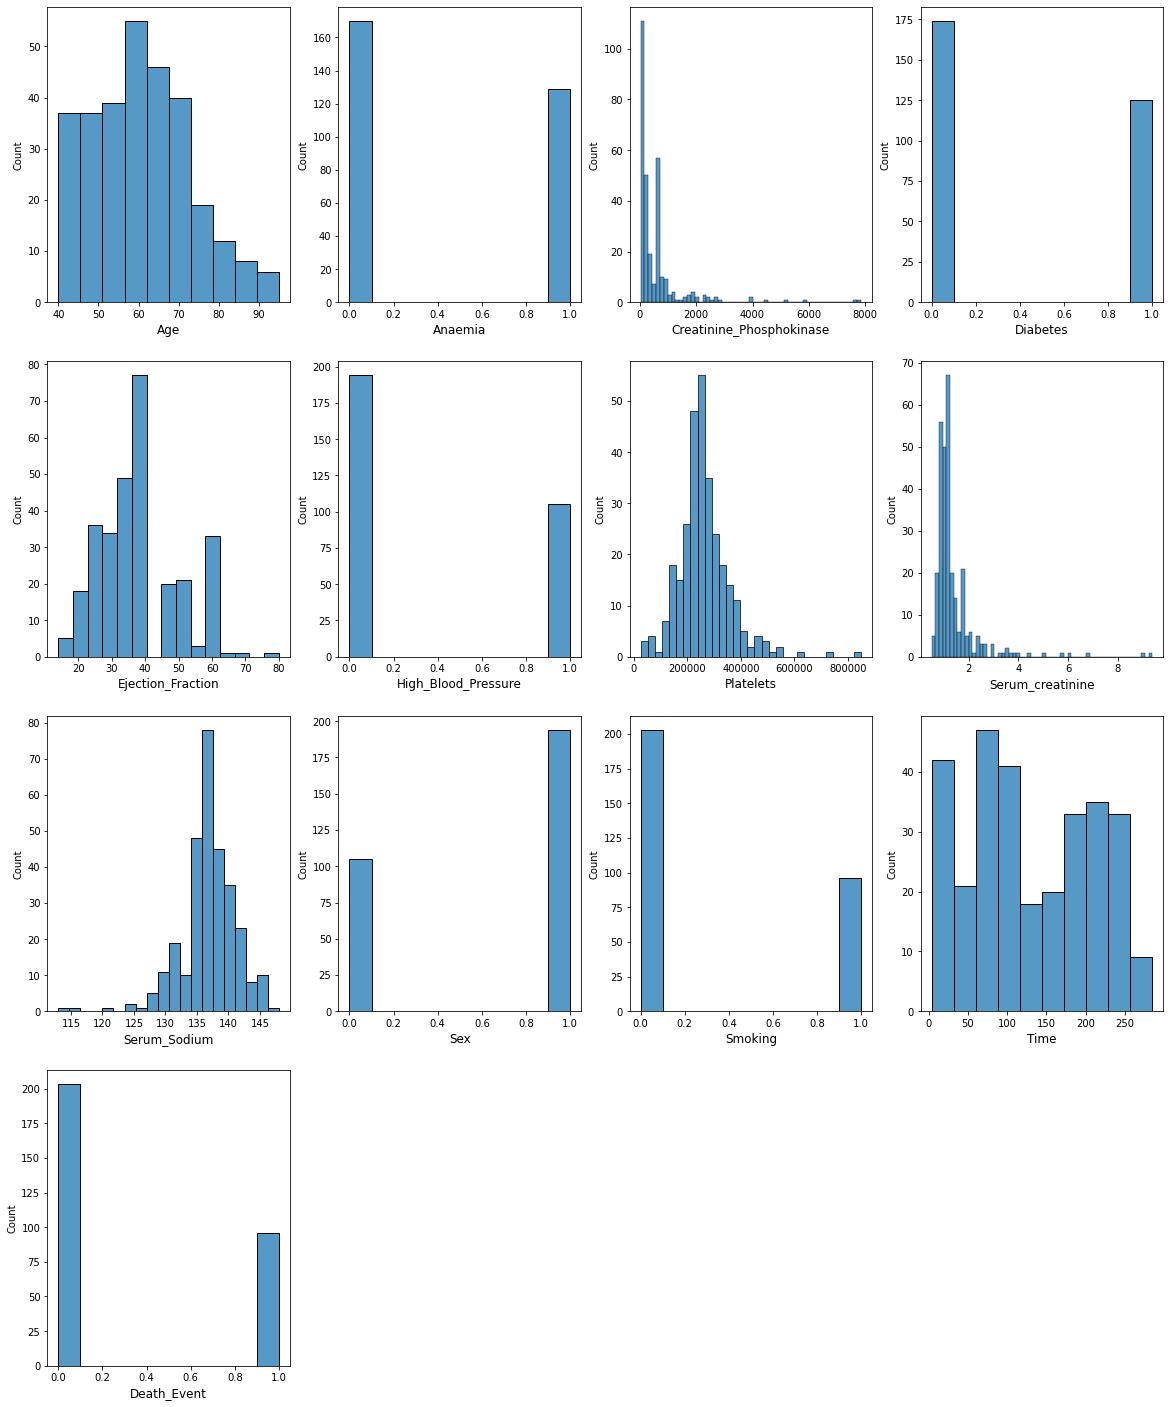

In [ ]:
## In order to understand better how all the features are distributed we are going to visualize them using histplot
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df:
    if feature_num <= 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.histplot(df[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

Conclusions from the visuals :
There is a notable skew in certain features like platelets, creatinine_phosphokinase but will skip the same as these features seem to have less impact on survival as we will see below

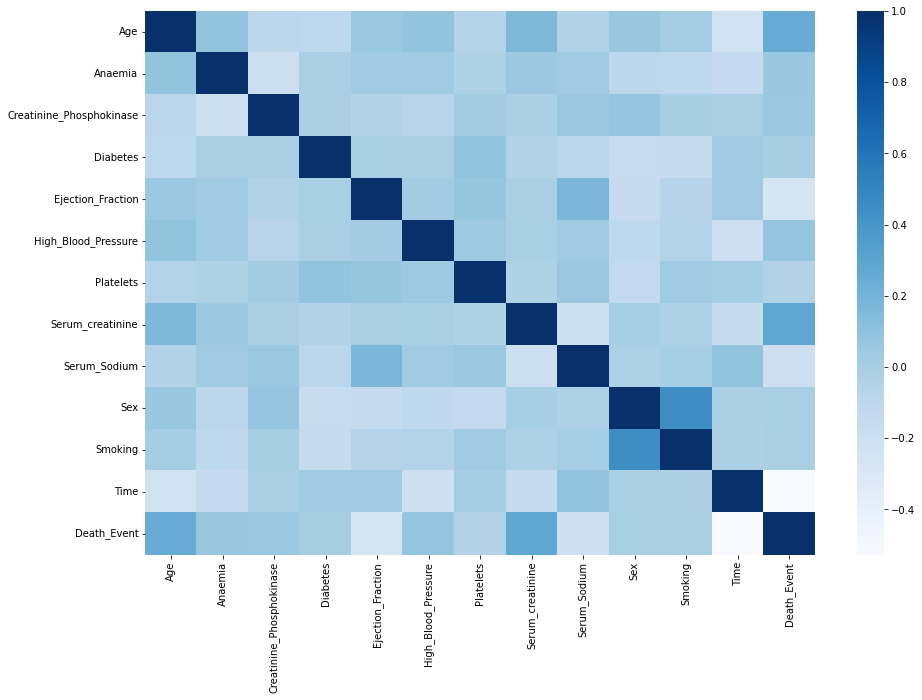

In [ ]:
## heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="Blues")

Conclusions from the heatmap :


*   Death event looks to be highly correlated with serum_creatinine and age
*   Survival event looks to be highly correlated with time, ejection_fraction, serum_sodium
*   Sex and smoking have the least correlation with DEATH_EVENT

In [ ]:
# With this plot, we have the possible scenerios for a given patient according to their categorical values
fig = px.parallel_categories(df[["Sex","Smoking","Diabetes","Anaemia","High_Blood_Pressure","Death_Event"]], color='Death_Event', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

###No problem found in dataset so we can proceed with the calculations

##*## Subject 3 ## Perform method Random Forest to check the results of the paper*



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
# delete time feature to be the same with method in paper
df_without_time = df.drop(columns='Time')

# create 
x = df_without_time.drop(columns='Death_Event')
y = df_without_time['Death_Event']

###Feature Importance
Feature importance is a procedure to assign scores to features to indicate the relative importance of each feature when building a model. The scores provide insight into the dataset, telling us which features are the most or the least relevant. After building the model, we use feature_importances_ to view the relative importance scores of each feature. We can interpret from the bar chart below that **Serum Creatinine** is the most importance feature in prediction.

In [ ]:
# run random forest method
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.14750736 0.02093522 0.13029316 0.01923608 0.18201634 0.0245855
 0.12015111 0.1929453  0.12059983 0.02299007 0.01874003]


Text(0.5, 0, 'Feature Importance')

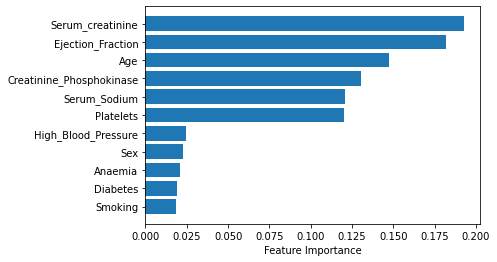

In [ ]:
# results in visual
sort = model.feature_importances_.argsort()
plt.barh(x.columns[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance")

###Now lets create the accuracy score

In [ ]:
# Create the frames for the method random forest
inp_data = df_without_time.drop(columns='Death_Event')
out_data = df_without_time[['Death_Event']]

In [ ]:
def result(clf, inp1 ,out1 ):

## split to 70 - 30 % as the paper
    X_train, X_test, y_train, y_test = train_test_split(inp1, out1, test_size=0.3, random_state=0)

## Applying Transformer
    sc      = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test  = sc.fit_transform(X_test)

    print("-> Number of split train and test : \n")
    print("  X_train Shape : ", X_train.shape)
    print("  X_test Shape  : ", X_test.shape)
    print("  y_train Shape : ", y_train.shape)
    print("  y_test Shape  : ", y_test.shape , "\n")

## Fit and predict values  
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)

## Print Scores   
    train_accuracy = clf.score(X_train, y_train.values.ravel())
    test_accuracy  = clf.score(X_test, y_test)
    cv_accuracy    = np.mean(cross_val_score(clf, X_train, y_train.values.ravel(), cv=5))
    #accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])

    print('->Final print scores :\n')
    print('  Train Accuracy Score %.4f  ' % train_accuracy )
    print('  Test Accuracy Score  %.4f  ' % test_accuracy  )
    print('  cv_accuracy Score %.4f     ' % cv_accuracy    )

In [ ]:
## run random forest and print scores 
clf = RandomForestClassifier(random_state=0)
result(clf, inp_data, out_data)

-> Number of split train and test : 

  X_train Shape :  (209, 11)
  X_test Shape  :  (90, 11)
  y_train Shape :  (209, 1)
  y_test Shape  :  (90, 1) 

->Final print scores :

  Train Accuracy Score 1.0000  
  Test Accuracy Score  0.7444  
  cv_accuracy Score 0.7177     


We successfully reproduced the method of Random Forest as the paper with Accuracy Score equal to 0.74
  
### Run random forest in a loop to find the mean and best accuracy
To go further we will perform a loop of 100 times to produce the best and mean score of accuracy in order to compare them later with the corresponding amounts of random forest method after PCA implementation

In [ ]:
## Create funtion to find best and mean accuracy over 100 loops
def best_mean_result(clf, inp1, out1, n_estimators = 100, max_features ='auto', max_depth = None, min_samples_split=11 ):    
    
    scores = [] 
    for i in range(0,100): # 100 samples
        n_estimators, max_features, max_depth, min_samples_split
        X_train, X_test, y_train, y_test = train_test_split(inp1, out1, test_size=0.3)
        clf = RandomForestClassifier(n_estimators      = n_estimators,
                                     max_features      = max_features,
                                     max_depth         = max_depth,
                                     min_samples_split = min_samples_split) 
        
        sc      = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test  = sc.fit_transform(X_test)
        clf.fit(X_train, y_train.values.ravel())
        scores.append(accuracy_score(clf.predict(X_test), y_test)) 

    plt.hist(scores)
    plt.show()
    print("Best Score: {}\nMean Score: {}".format(np.max(scores), np.mean(scores)))

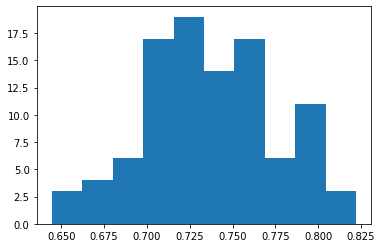

Best Score: 0.8222222222222222
Mean Score: 0.7381111111111112


In [ ]:
## run best mean for random forest
best_mean_result(clf, inp_data, out_data)

##*## Subject 4 ## Perform PCA to reduce the features and after that implement method Random Forest to check the results*
Apply PCA on the continuous variables to get better visualizations. We use PCA to reduce the dimensionality of the dataset. PCA accomplishes this by capturing the variance in the dataset. It gets the components in such a way that they are in the direction of the highest variance

In [ ]:
## imports for running pca part
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
## In order to perform PCA method , we separate the features to continuous and categorical 
cont_cols = ['Creatinine_Phosphokinase', 'Platelets','Serum_creatinine', 'Serum_Sodium', 'Ejection_Fraction','Age']
cat_vars = ['Anaemia', 'Diabetes', 'High_Blood_Pressure', 'Sex', 'Smoking','Death_Event']

In [ ]:
# find min max value for categorical features and create a unified dataframe with continuous features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_without_time[['Creatinine_Phosphokinase', 'Platelets','Serum_creatinine', 'Serum_Sodium', 'Ejection_Fraction','Age']])
scaled_df = df_without_time.copy()
scaled_df[cont_cols] = scaled_features
scaled_df.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Death_Event
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,1


In [ ]:
## now perform the PCA
pca_data = scaled_df.drop(columns='Death_Event')
pca1 = PCA()
X_train_rf = pca1.fit_transform(pca_data)
pca1.fit_transform(pca_data).shape

(299, 11)

### Decision on how many PCA components we are going to keep

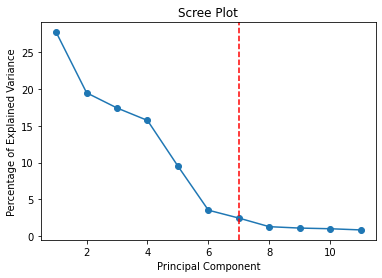

In [ ]:
## Plot the variance of the new calculated features from PCA
percentage_variance = np.round(pca1.explained_variance_ratio_ * 100, decimals=2)
xlabels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]

plt.plot(range(1,len(percentage_variance)+1), percentage_variance, '-o')
plt.axvline(x=7, color='red', linestyle='--')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
## set score to 0.95 and fit to find how many features it is best to keep
pca95 = PCA(n_components=0.95)
X_train_reduced_rf = pca95.fit_transform(pca_data)
pca95.fit_transform(pca_data).shape

(299, 7)

As we can see from the previous diagram, from component number 7 and after the variance does not change significantly, so we will keep the range of components 1-7.

Also we calculated the previous optical observation using code. We indicated the ratio of variance that we wanted to preserve to 95% of the dataset's variance, so we define n_components=0.95 (between 0.0 to 1.0) . After transformation, the dimensionality has been reduced from 11 to 7 components.

Now let see in a visual way the contribution of the original features at the new corresponding Principal Components Features :

In [ ]:
## create visuals for the new componenets of PCA about the contribution of the initial features
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(30, 20))

row = -1; col = 0
for i in range(0,11):
    
    if(i%2 == 0): 
        col = 0
        row = row + 1
    else: 
        col=1
    
    sns.barplot(x=abs(pca1.components_[i]), y=pca_data.columns, orient='h', ax=ax[row][col])
    ax[row][col].set_title('Principal Component ' + str(i+1))

###Feature Importance of variables after PCA

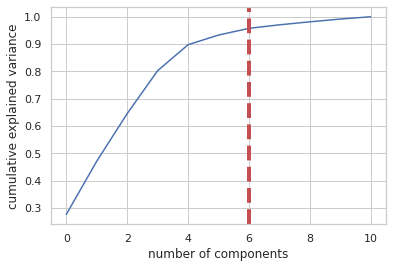

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.276792,0.276792
1,0.471398,0.194606
2,0.645410,0.174012
3,0.802523,0.157112
4,0.897650,0.095127
5,0.932956,0.035307
6,0.957527,0.024571
7,0.970443,0.012917
8,0.981411,0.010968
9,0.991530,0.010119


In [ ]:
# check what pca components to keep from variance 
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=6, ymin=0, ymax=1)
display(plt.show())

evr = pca1.explained_variance_ratio_
cvr = np.cumsum(pca1.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(11))

The previous graph also shows that after more than 7 components, we don’t gain very much explained variance.

### Implementation of RF after PCA 

Last we will implement again the method of Random Forest but now on the features calculated from PCA. As we will see the accuracy of Random Forest model decrease after PCA is applied and same goes with best and mean score after 100 runs  :  

> Test Accuracy

*   Before PCA : 0.744
*   After  PCA : 0.722 

> Best Accuracy

*   Before PCA : 0.822
*   After  PCA : 0.811

> Mean Accuracy

*   Before PCA : 0.736
*   After  PCA : 0.732

In [ ]:
# run Random Forest with reduced variables after PCA
clf_pca = RandomForestClassifier(random_state=0)
result(clf_pca,X_train_reduced_rf, out_data )


-> Number of split train and test : 

  X_train Shape :  (209, 7)
  X_test Shape  :  (90, 7)
  y_train Shape :  (209, 1)
  y_test Shape  :  (90, 1) 

->Final print scores :

  Train Accuracy Score 1.0000  
  Test Accuracy Score  0.7222  
  cv_accuracy Score 0.7271     


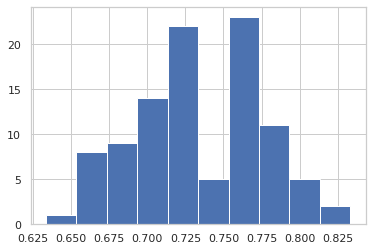

Best Score: 0.8333333333333334
Mean Score: 0.7354444444444446


In [ ]:
## run best mean for random forest after pca
best_mean_result(clf_pca,X_train_reduced_rf, out_data )

From this experiment, we can conclude that reducing the dimensionality of the dataset does not always perform a better result than using all dimensions.

##*## Subject 5 ## Compare variance of initial features with those that produced from PCA*

Plot feature importance for the two Random Forest methods applied ( on initial dataset and after PCA with all features )

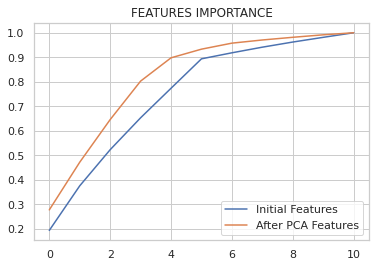

In [ ]:
initial_features_importance = model.feature_importances_.tolist()
initial_features_importance.sort(reverse=True)

plt.figure()
plt.title("FEATURES IMPORTANCE")
plt.plot(np.cumsum(initial_features_importance), label='Initial Features')
plt.plot(np.cumsum(pca1.explained_variance_ratio_), label='After PCA Features')
plt.grid(True)
plt.legend()
plt.show()

Compare feature importances for the two Random Forest methods applied ( on initial dataset and after PCA with reduced to 7 features )

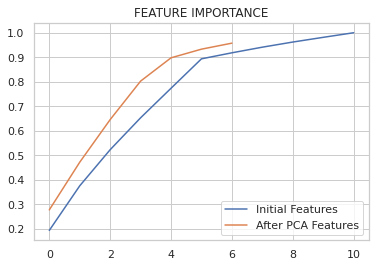

In [ ]:
initial_features_importance = model.feature_importances_.tolist()
initial_features_importance.sort(reverse=True)

plt.figure()
plt.title("FEATURE IMPORTANCE")
plt.plot(np.cumsum(initial_features_importance), label='Initial Features')
plt.plot(np.cumsum(pca95.explained_variance_ratio_), label='After PCA Features')
plt.grid(True)
plt.legend()
plt.show()

-------------------------------
  ###              Excersice 2 
-------------------------------

## Create Pipeline with PCA and Random Forest

In [166]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [161]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
pipe = Pipeline([("scaler",MinMaxScaler()), ('pca_pip', PCA()), ('clf_pip', RandomForestClassifier())])
pipe
# show keys 
pipe.get_params()

{'clf_pip': RandomForestClassifier(),
 'clf_pip__bootstrap': True,
 'clf_pip__ccp_alpha': 0.0,
 'clf_pip__class_weight': None,
 'clf_pip__criterion': 'gini',
 'clf_pip__max_depth': None,
 'clf_pip__max_features': 'auto',
 'clf_pip__max_leaf_nodes': None,
 'clf_pip__max_samples': None,
 'clf_pip__min_impurity_decrease': 0.0,
 'clf_pip__min_samples_leaf': 1,
 'clf_pip__min_samples_split': 2,
 'clf_pip__min_weight_fraction_leaf': 0.0,
 'clf_pip__n_estimators': 100,
 'clf_pip__n_jobs': None,
 'clf_pip__oob_score': False,
 'clf_pip__random_state': None,
 'clf_pip__verbose': 0,
 'clf_pip__warm_start': False,
 'memory': None,
 'pca_pip': PCA(),
 'pca_pip__copy': True,
 'pca_pip__iterated_power': 'auto',
 'pca_pip__n_components': None,
 'pca_pip__random_state': None,
 'pca_pip__svd_solver': 'auto',
 'pca_pip__tol': 0.0,
 'pca_pip__whiten': False,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()),
  

In [148]:
# set parameters 
pipe.set_params(clf_pip__random_state=0)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca_pip', PCA()),
                ('clf_pip', RandomForestClassifier(random_state=0))])

## As previous but now with pipeline

In [ ]:
pipe.fit(X_train, y_train.values.ravel())

train_accuracy_pipe = pipe.score(X_train, y_train.values.ravel())
test_accuracy_pipe  = pipe.score(X_test, y_test)

y_pred = pipe.predict(X_test)

print('->Final print scores :\n')
print('Random Forest Classifier PCA accurasy      : %.4f' % test_accuracy_pipe  )
print('Random Forest Classifier PCA f1-score      : {:.4f}'.format(f1_score( y_test      , y_pred)))
print('Random Forest Classifier PCA precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Random Forest Classifier PCA recall        : {:.4f}'.format(recall_score(y_test   , y_pred)))
print("Random Forest Classifier PCA roc auc score : {:.4f}".format(roc_auc_score(y_test  , y_pred)))
print("\n" , classification_report(y_test, y_pred))

##GridSearchCV

In [ ]:
param_grid = {
    "pca_pip__n_components"             : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'clf_pip__criterion'                : ['gini', 'entropy'],
    'clf_pip__n_estimators'             : np.arange(0,200,2),
    'clf_pip__ccp_alpha'                : [0.0,0.1,0.5],
}
search = GridSearchCV(pipe, param_grid, cv=3)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

##RandomizedSearchCV

In [168]:
param_gridRand = {
    "pca_pip__n_components"             : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'clf_pip__criterion'                : ['gini', 'entropy'],
    'clf_pip__ccp_alpha'                : [0.0,0.1,0.5],
}
searchRand =  RandomizedSearchCV(pipe, param_gridRand,random_state=42)
searchRand.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % searchRand.best_score_)
print(searchRand.best_params_)

Best parameter (CV score=0.675):
{'pca_pip__n_components': 11, 'clf_pip__criterion': 'gini', 'clf_pip__ccp_alpha': 0.5}
